In [4]:
from sqlalchemy import create_engine
import pandas as pd

# Use actual MySQL credentials; if there's no password, leave it empty
engine = create_engine("mysql+pymysql://root:@localhost/world")

# Fetch data
df = pd.read_sql_query("SELECT * FROM city", engine)
print(df.head())



   ID            Name CountryCode       District  Population
0   1           Kabul         AFG          Kabol     1780000
1   2        Qandahar         AFG       Qandahar      237500
2   3           Herat         AFG          Herat      186800
3   4  Mazar-e-Sharif         AFG          Balkh      127800
4   5       Amsterdam         NLD  Noord-Holland      731200


In [5]:
# Select specific columns:

cities_df = df[['Name', 'CountryCode', 'Population']]  # Select specific columns


In [6]:
cities_df

,Name,CountryCode,Population
0,Kabul,AFG,1780000
1,Qandahar,AFG,237500
2,Herat,AFG,186800
3,Mazar-e-Sharif,AFG,127800
4,Amsterdam,NLD,731200
...,...,...,...
4074,Khan Yunis,PSE,123175
4075,Hebron,PSE,119401
4076,Jabaliya,PSE,113901
4077,Nablus,PSE,100231


In [7]:
# Filter cities with a population greater than 1 million
filtered_df = df[df['Population'] > 1000000]
print(filtered_df)


        ID          Name CountryCode          District  Population
0        1         Kabul         AFG             Kabol     1780000
34      35         Alger         DZA             Alger     2168000
55      56        Luanda         AGO            Luanda     2022000
68      69  Buenos Aires         ARG  Distrito Federal     2982146
69      70    La Matanza         ARG      Buenos Aires     1266461
...    ...           ...         ...               ...         ...
3797  3798       Phoenix         USA           Arizona     1321045
3798  3799     San Diego         USA        California     1223400
3799  3800        Dallas         USA             Texas     1188580
3800  3801   San Antonio         USA             Texas     1144646
4067  4068        Harare         ZWE            Harare     1410000

[237 rows x 5 columns]


In [8]:
# Cities in the 'USA' with population greater than 1 million
filtered_df = df[(df['CountryCode'] == 'USA') & (df['Population'] > 1000000)]
print(filtered_df)


        ID          Name CountryCode      District  Population
3792  3793      New York         USA      New York     8008278
3793  3794   Los Angeles         USA    California     3694820
3794  3795       Chicago         USA      Illinois     2896016
3795  3796       Houston         USA         Texas     1953631
3796  3797  Philadelphia         USA  Pennsylvania     1517550
3797  3798       Phoenix         USA       Arizona     1321045
3798  3799     San Diego         USA    California     1223400
3799  3800        Dallas         USA         Texas     1188580
3800  3801   San Antonio         USA         Texas     1144646


## Grouping and Aggregation

In [9]:
# Group by 'CountryCode' and calculate mean population
grouped_df = df.groupby('CountryCode')['Population'].mean()
print(grouped_df)


CountryCode
ABW     29034.000000
AFG    583025.000000
AGO    512320.000000
AIA       778.000000
ALB    270000.000000
           ...      
YEM    290616.666667
YUG    273688.375000
ZAF    345372.045455
ZMB    353357.142857
ZWE    455070.000000
Name: Population, Length: 232, dtype: float64


In [10]:
# Count the number of cities by country:

city_counts = df.groupby('CountryCode')['Name'].count()
print(city_counts)

CountryCode
ABW     1
AFG     4
AGO     5
AIA     2
ALB     1
       ..
YEM     6
YUG     8
ZAF    44
ZMB     7
ZWE     6
Name: Name, Length: 232, dtype: int64


## Sorting Dats

In [11]:
sorted_df = df.sort_values(by='Population', ascending=False)
print(sorted_df.head(10))  # View top 10 cities with the highest population

        ID              Name CountryCode          District  Population
1023  1024   Mumbai (Bombay)         IND       Maharashtra    10500000
2330  2331             Seoul         KOR             Seoul     9981619
205    206         São Paulo         BRA         São Paulo     9968485
1889  1890          Shanghai         CHN          Shanghai     9696300
938    939           Jakarta         IDN      Jakarta Raya     9604900
2821  2822           Karachi         PAK             Sindh     9269265
3356  3357          Istanbul         TUR          Istanbul     8787958
2514  2515  Ciudad de México         MEX  Distrito Federal     8591309
3579  3580            Moscow         RUS     Moscow (City)     8389200
3792  3793          New York         USA          New York     8008278


In [12]:
#Sort data by multiple columns (e.g., first by country, then by population):

sorted_df = df.sort_values(by=['CountryCode', 'Population'], ascending=[True, False])
print(sorted_df.head(10))

      ID            Name CountryCode  District  Population
128  129      Oranjestad         ABW         –       29034
0      1           Kabul         AFG     Kabol     1780000
1      2        Qandahar         AFG  Qandahar      237500
2      3           Herat         AFG     Herat      186800
3      4  Mazar-e-Sharif         AFG     Balkh      127800
55    56          Luanda         AGO    Luanda     2022000
56    57          Huambo         AGO    Huambo      163100
57    58          Lobito         AGO  Benguela      130000
58    59        Benguela         AGO  Benguela      128300
59    60          Namibe         AGO    Namibe      118200


## Data Cleaning

In [13]:
#Remove rows with missing values:

cleaned_df = df.dropna()  # Removes any rows with missing values
print(cleaned_df)

        ID            Name CountryCode       District  Population
0        1           Kabul         AFG          Kabol     1780000
1        2        Qandahar         AFG       Qandahar      237500
2        3           Herat         AFG          Herat      186800
3        4  Mazar-e-Sharif         AFG          Balkh      127800
4        5       Amsterdam         NLD  Noord-Holland      731200
...    ...             ...         ...            ...         ...
4074  4075      Khan Yunis         PSE     Khan Yunis      123175
4075  4076          Hebron         PSE         Hebron      119401
4076  4077        Jabaliya         PSE     North Gaza      113901
4077  4078          Nablus         PSE         Nablus      100231
4078  4079           Rafah         PSE          Rafah       92020

[4079 rows x 5 columns]


In [14]:
# Fill missing values with a specific value:
df['Population'] = df['Population'].fillna(0)  # Replace NaN population with 0

In [15]:
# Replace specific values:
df['CountryCode'] = df['CountryCode'].replace('USA', 'United States')

In [16]:
df.sample(10)

,ID,Name,CountryCode,District,Population
3411,3412,Erzincan,TUR,Erzincan,102304
2262,2263,Bucaramanga,COL,Santander,515555
320,321,Rio Grande,BRA,Rio Grande do Sul,182222
1714,1715,Kawachinagano,JPN,Osaka,119666
4046,4047,Richmond,United States,California,94100
1313,1314,Qutubullapur,IND,Andhra Pradesh,105380
189,190,Saint George,BMU,Saint George´s,1800
18,19,Zaanstad,NLD,Noord-Holland,135621
719,720,Kempton Park,ZAF,Gauteng,442633
449,450,Corumbá,BRA,Mato Grosso do Sul,90111


In [17]:
df = df.drop_duplicates(subset='Name')  # Remove duplicate cities based on the 'Name' column


In [ ]:
# Data Transformation


In [19]:
# Create new columns based on existing columns:

df['Population_in_million'] = df['Population'] / 1000000  # Convert population to millions
print(df[['Name', 'Population', 'Population_in_million']].head())

             Name  Population  Population_in_million
0           Kabul     1780000                 1.7800
1        Qandahar      237500                 0.2375
2           Herat      186800                 0.1868
3  Mazar-e-Sharif      127800                 0.1278
4       Amsterdam      731200                 0.7312
C:\Users\Eden Computers\AppData\Local\Temp\ipykernel_4192\3373046888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population_in_million'] = df['Population'] / 1000000  # Convert population to millions


In [20]:
# Apply a function to a column (e.g., converting city names to uppercase):

df['Name'] = df['Name'].apply(lambda x: x.upper())
print(df[['Name']].head())

             Name
0           KABUL
1        QANDAHAR
2           HERAT
3  MAZAR-E-SHARIF
4       AMSTERDAM
C:\Users\Eden Computers\AppData\Local\Temp\ipykernel_4192\1482500753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name'] = df['Name'].apply(lambda x: x.upper())


In [22]:
# Write the DataFrame back to MySQL (e.g., creating a new table)
df.to_sql('new_table_name', engine, if_exists='replace', index=False)

# If you want to append data to an existing table
df.to_sql('existing_table_name', engine, if_exists='append', index=False)


4001

## Data Visualization

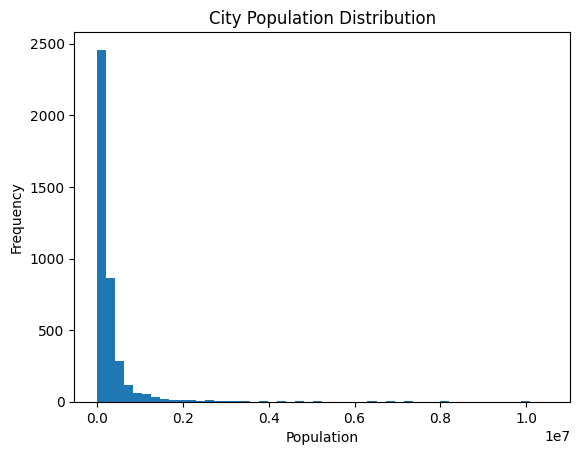

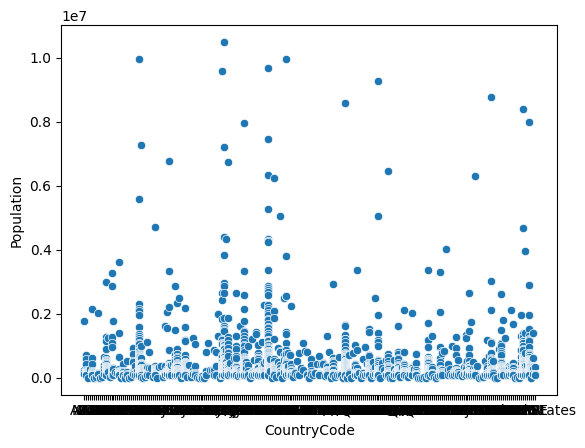

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram of city populations
plt.hist(df['Population'], bins=50)
plt.title('City Population Distribution')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

# Scatter plot for population vs. country
sns.scatterplot(data=df, x='CountryCode', y='Population')
plt.show()


In [25]:
import sqlite3

# Connect to SQLite database (it will create the database file if it doesn't exist)
conn = sqlite3.connect('school.db')  # Connect to school.db (or any database name you want)
cursor = conn.cursor()


In [26]:
# Create the students table
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    age INTEGER,
    grade TEXT
)
''')

# Commit the transaction
conn.commit()


In [27]:
# Insert data into the students table
cursor.execute("INSERT INTO students (name, age, grade) VALUES (?, ?, ?)", ('Noor', 20, 'A'))
cursor.execute("INSERT INTO students (name, age, grade) VALUES (?, ?, ?)", ('Sidra', 22, 'B'))

# Commit the transaction
conn.commit()



In [28]:
# select data from the table
# Execute a SELECT query to retrieve data
cursor.execute("SELECT * FROM students")

# Fetch all rows
rows = cursor.fetchall()

# Display the rows
for row in rows:
    print(row)


(1, 'Noor', 20, 'A')
(2, 'Sidra', 22, 'B')


In [29]:
# update
# Update a student's grade
cursor.execute("UPDATE students SET grade = ? WHERE name = ?", ('B', 'Noor'))

# Commit the changes
conn.commit()


In [30]:
# Delete a student record
cursor.execute("DELETE FROM students WHERE name = ?", ('Noor',))

# Commit the changes
conn.commit()


In [32]:
# Fetch all rows
rows = cursor.fetchall()

# Display the rows
for row in rows:
    print(row)

In [35]:
import pandas as pd
from sqlalchemy import create_engine

# Sample DataFrame
data = {
    'name': ['Alice', 'Bob', 'Charlie'],
    'age': [23, 25, 30],
    'grade': ['A', 'B', 'A']
}
df = pd.DataFrame(data)

# MySQL connection settings (NO PASSWORD)
username = 'root'          # Or your MySQL username
host = 'localhost'
port = '3306'
database = 'world'

# Create SQLAlchemy engine without password
engine = create_engine(f'mysql+pymysql://{username}@{host}:{port}/{database}')

# Save the DataFrame to MySQL
df.to_sql('students_table', engine, if_exists='replace', index=False)

print("Data saved to MySQL successfully!")


Data saved to MySQL successfully!
